<a href="https://colab.research.google.com/github/shumshersubashgautam/AI_TRAINING/blob/master/DronesimulationRLGITHUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AIcrowd/droneRL-workshop.git

Cloning into 'droneRL-workshop'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 648 (delta 49), reused 61 (delta 19), pack-reused 543
Receiving objects: 100% (648/648), 15.03 MiB | 16.79 MiB/s, done.
Resolving deltas: 100% (375/375), done.


In [2]:
cd /content/droneRL-workshop

/content/droneRL-workshop


In [0]:
import sys

# Setup for use in Colab
if 'google.colab' in sys.modules:
    # Clone GitHub repository
    !git clone https://github.com/pacm/rl-workshop.git --single-branch --branch updated-workshop
        
    # Install packages via pip
    !pip install -r "rl-workshop/colab-requirements.txt"
    
    # Restart Runtime so everything takes effect
    import os
    os.kill(os.getpid(), 9)

    # Your Runtime will crash after this - this is normal!

Cloning into 'rl-workshop'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 583 (delta 16), reused 26 (delta 6), pack-reused 540
Receiving objects: 100% (583/583), 8.12 MiB | 11.32 MiB/s, done.
Resolving deltas: 100% (340/340), done.
     |████████████████████████████████| 1.6MB 8.9MB/s 
     |████████████████████████████████| 2.1MB 47.7MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 225kB 51.7MB/s 
     |████████████████████████████████| 13.1MB 42.7MB/s 
     |████████████████████████████████| 20.0MB 161kB/s 
     |████████████████████████████████| 1.0MB 47.4MB/s 
  Created wheel for gym: filename=gym-0.15.4-cp36-none-any.whl size=1648483 sha256=4071dc2735cb898cd741e87dcadfe5ceb7430d972583f8b907dc300f3fcb2813
  Stored in directory: /root/.cache/pip/wheels/e9/26/9b/8a1a6599a91077a938ac4348cc3d3ac84bfab0dbfddeb4c6e7
Successfully built 

In [3]:
cd /content/droneRL-workshop/rl-workshop

/content/droneRL-workshop/rl-workshop


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from PIL import Image
from IPython.lib.pretty import pretty

In [5]:
from env.env import DeliveryDrones

# Create environment
env = DeliveryDrones()

# Resets it and get the initial observation
observation = env.reset()

# Render in text
print(env.render(mode='ansi'))

+---+---+---+---+---+---+---+---+
|   |   | @ |   |   |   |[ ]|   |
+---+---+---+---+---+---+---+---+
|   | @ |   | # |   |[0]|   | x |
+---+---+---+---+---+---+---+---+
| # | x |   |   |   | @ | # |[ ]|
+---+---+---+---+---+---+---+---+
|   |   |   | x | @ |   |[ ]| @ |
+---+---+---+---+---+---+---+---+
|[ ]|   |   | x | x |   |   |   |
+---+---+---+---+---+---+---+---+
| x | # |   | # | # |   | x |[ ]|
+---+---+---+---+---+---+---+---+
|   |   | # | # |   | # |   | x |
+---+---+---+---+---+---+---+---+
|   |   | 2 |   |   | @ |1<x|   |
+---+---+---+---+---+---+---+---+


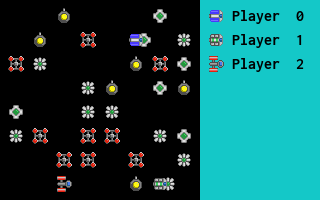

In [6]:
# Render as an RGB image to see things more clearly
Image.fromarray(env.render(mode='rgb_array'))

In [7]:
# Observations are returned after env.reset() or env.step() calls
print(observation)

{'ground': <env.env.Grid object at 0x7fa3441dfd68>, 'air': <env.env.Grid object at 0x7fa3229636a0>}


In [8]:
# We can inspect what's on the ground
observation['ground'].grid

array([[None, None, @, None, None, None, Z, None],
       [None, @, None, #, None, Z, None, P],
       [#, P, None, None, None, @, #, Z],
       [None, None, None, P, @, None, Z, @],
       [Z, None, None, P, P, None, None, None],
       [P, #, None, #, #, None, P, Z],
       [None, None, #, #, None, #, None, P],
       [None, None, None, None, None, @, None, None]], dtype=object)

{0: OrderedDict([('target_dir', 2), ('station_dir', 0), ('charge_level', 3)]),
 1: OrderedDict([('target_dir', 7), ('station_dir', 6), ('charge_level', 3)]),
 2: OrderedDict([('target_dir', 6), ('station_dir', 4), ('charge_level', 3)])}


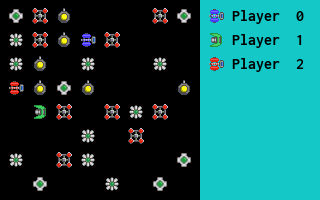

In [9]:
from env.wrappers import CompassQTable, CompassChargeQTable, LidarCompassQTable, LidarCompassChargeQTable

# Create the environment
env = DeliveryDrones()

# Use an observation wrappers
#env = CompassQTable(env)
env = CompassChargeQTable(env)
#env = LidarCompassQTable(env)
#env = LidarCompassChargeQTable(env)

# Reset the environment and print inital observation
observation = env.reset()
print(pretty(observation))

# Render as an RGB image
Image.fromarray(env.render(mode='rgb_array'))

In [10]:

# Print the state in a nicer way using `env.format_state`
{drone: env.format_state(observation) for drone, observation in observation.items()}

{0: 'target: ↓, station: ←, charge: 3',
 1: 'target: ↖, station: ↑, charge: 3',
 2: 'target: ↑, station: →, charge: 3'}

In [0]:
from env.env import Action

Action??

Rewards: {0: 0}


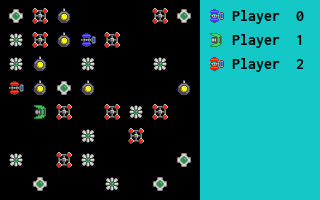

In [12]:
observation, reward, done, info = env.step({0: Action.STAY})

print('Rewards: {}'.format(reward))
Image.fromarray(env.render(mode='rgb_array'))

In [13]:
{drone: env.format_state(observation) for drone, observation in observation.items()}

{0: 'target: ↓, station: ←, charge: 3',
 1: 'target: ↖, station: ↑, charge: 3',
 2: 'target: ↑, station: →, charge: 3'}

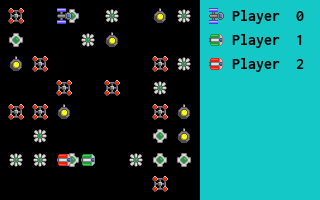

In [14]:
from env.wrappers import WindowedGridView

env = WindowedGridView(DeliveryDrones(), radius=2)
states = env.reset()
Image.fromarray(env.render(mode='rgb_array'))

In [15]:
{drone: env.format_state(state) for drone, state in states.items()}

{0: 'Numpy array (5, 5, 6)',
 1: 'Numpy array (5, 5, 6)',
 2: 'Numpy array (5, 5, 6)'}

In [16]:
states[0][:, :, 5] # Obstacles from the perspective of drone 0

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [17]:
from agents.random import RandomAgent

# Create and setup the environment
env = WindowedGridView(DeliveryDrones(), radius=3)
states = env.reset()

# Create random agents
agents = {drone.index: RandomAgent(env) for drone in env.drones}
agents

{0: <agents.random.RandomAgent at 0x7fa3220adba8>,
 1: <agents.random.RandomAgent at 0x7fa3220adda0>,
 2: <agents.random.RandomAgent at 0x7fa3220ad668>}

In [0]:
# The random agents just pick an action randomly
RandomAgent??

In [19]:
from helpers.rl_helpers import test_agents

# Run agents for 1000 steps
rewards_log = test_agents(env, agents, n_steps=1000, seed=0)

# Print rewards
for drone_index, rewards in rewards_log.items():
    print('Drone {} rewards: {} ..'.format(drone_index, rewards[:10]))


Drone 0 rewards: [-0.1, -1, 0, -1, 0, 0, 0, 0, 0, 0] ..
Drone 1 rewards: [-1, -1, 0, 0, 0, 0, 1, 0, 0, 0] ..
Drone 2 rewards: [0, -0.1, 0, 0, 0, 0, 0, 0, 0, 0] ..


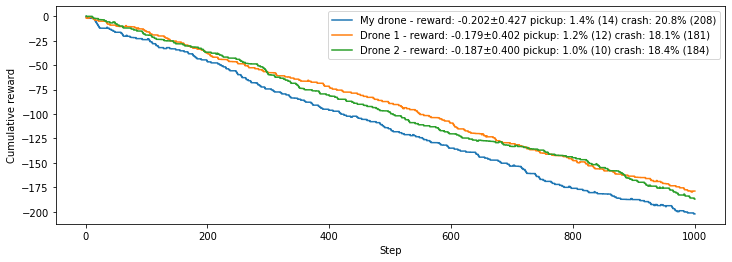

In [20]:
from helpers.rl_helpers import plot_cumulative_rewards

plot_cumulative_rewards(
    rewards_log,
    events={'pickup': [1], 'crash': [-1]}, # Optional, default: pickup/crash ±1
    drones_labels={0: 'My drone'}, # Optional, default: drone index 
)

In [21]:
from agents.dqn import DQNAgent, DenseQNetworkFactory
from helpers.rl_helpers import MultiAgentTrainer, plot_rolling_rewards

# Create and setup the environment
env = WindowedGridView(DeliveryDrones(), radius=3)
env.env_params.update({'n_drones': 3, 'skyscrapers_factor': 0, 'charge_reward': 0, 'discharge': 0})
states = env.reset()

# Create random agents
agents = {drone.index: RandomAgent(env) for drone in env.drones}

# Use a DQNAgent for agent 0 - we will see how this works next
agents[0] = DQNAgent(
    env, DenseQNetworkFactory(env, hidden_layers=[32, 32]),
    gamma=0.95, epsilon_start=1.0, epsilon_decay=0.999, epsilon_end=0.01,
    memory_size=10000, batch_size=64, target_update_interval=5
)

agents

{0: <agents.dqn.DQNAgent at 0x7fa2d46fe2b0>,
 1: <agents.random.RandomAgent at 0x7fa2d46fec50>,
 2: <agents.random.RandomAgent at 0x7fa2d46fe470>}

In [22]:
# Create trainer
trainer = MultiAgentTrainer(env, agents, reset_agents=True, seed=0)

# Train with different grids
trainer.train(1000)

# Print rewards
for drone_index, rewards in trainer.rewards_log.items():
    print('Drone {} rewards: {} ..'.format(drone_index, rewards[:10]))


Drone 0 rewards: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] ..
Drone 1 rewards: [0, -1, -1, 0, -1, 0, 0, 0, 0, 0] ..
Drone 2 rewards: [0, 0, -1, 0, -1, 0, 0, 0, 0, 0] ..


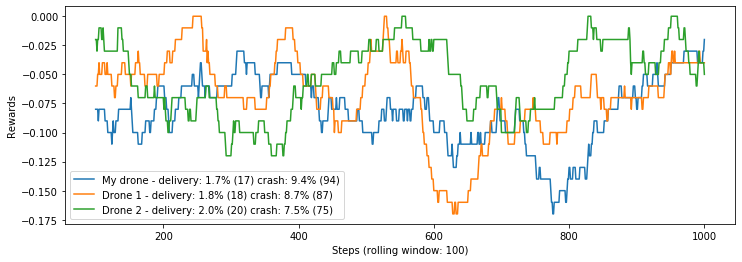

In [23]:
plot_rolling_rewards(
    trainer.rewards_log,
    drones_labels={0: 'My drone'}, # Optional: specify drone names
)

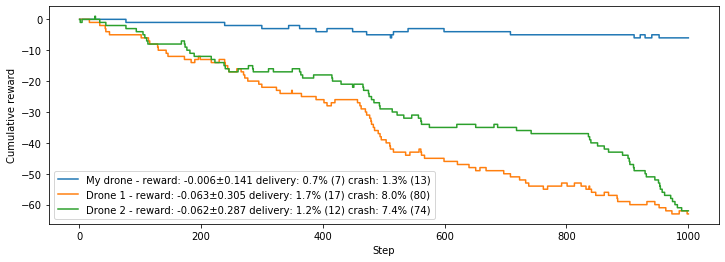

In [24]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=0)
plot_cumulative_rewards(rewards_log, drones_labels={0: 'My drone'})

In [25]:
from helpers.rl_helpers import render_video, ColabVideo

path = os.path.join('output', 'videos', 'intro-run.mp4')
render_video(env, agents, video_path=path, n_steps=120, fps=1, seed=None)

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3342336/45929032 bytes (7.3%)7495680/45929032 bytes (16.3%)11698176/45929032 bytes (25.5%)15835136/45929032 bytes (34.5%)19857408/45929032 bytes (43.2%)24010752/45929032 bytes (52.3%)28041216/45929032 bytes (61.1%)32186368/45929032 bytes (70.1%)36306944/45929032 bytes (79.1%)40435712/45929032 bytes (88.0%)44490752/45929032 bytes (96.9%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root


[MoviePy] >>>> Building video output/videos/intro-run.mp4
[MoviePy] Writing video output/videos/intro-run.mp4


100%|█████████▉| 2880/2881 [00:07<00:00, 386.37it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: output/videos/intro-run.mp4 



In [26]:
ColabVideo(path)

In [0]:
path = os.path.join('output', 'agents', 'first-agent.pt')
agents[0].save(path)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image

In [0]:
import sys

# Setup for use in Colab
if 'google.colab' in sys.modules:
    # Clone GitHub repository
    !git clone https://github.com/pacm/rl-workshop.git --single-branch --branch updated-workshop
        
    # Install packages via pip
    !pip install -r "rl-workshop/colab-requirements.txt"
    
    # Restart Runtime so everything takes effect
    import os
    os.kill(os.getpid(), 9)

    # Your Runtime will crash after this - this is normal!
    # Resume from next cell after it restarted

fatal: destination path 'rl-workshop' already exists and is not an empty directory.


In [1]:
cd /content/droneRL-workshop/rl-workshop

/content/droneRL-workshop/rl-workshop


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image

In [0]:
%run env/env.py
%run helpers/rl_helpers.py
%run agents/dqn.py
%run agents/qlearning.py
%run agents/random.py

In [9]:
# Environment without Skyscrapers + discharge
env = CompassQTable(DeliveryDrones())
env.env_params.update({'n_drones': 3, 'skyscrapers_factor': 0, 'stations_factor': 0,  'discharge': 0})
states = env.reset()

print('Observation space:', env.observation_space)
print('Initial state:', {drone_index: env.format_state(state) for drone_index, state in states.items()})
Image.fromarray(env.render(mode='rgb_array'))

NameError: ignored

In [0]:
import sys

# Checks that the Runtime is correct
if 'google.colab' in sys.modules:
    !nvidia-smi | grep -q 'failed' && echo "STOP! You are using a runtime without a GPU. Change the runtime type before going further!"

In [0]:
import sys

# Setup for use in Colab
if 'google.colab' in sys.modules:
    # Clone GitHub repository
    !git clone https://github.com/AIcrowd/droneRL-workshop
        
    # Install packages via pip
    !pip install -r "droneRL-workshop/colab-requirements.txt"
    
    # Restart Runtime so everything takes effect
    import os
    os.kill(os.getpid(), 9)

    # Your Runtime will crash after this - this is normal!
    # Resume from next cell after it restarted

Cloning into 'droneRL-workshop'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 648 (delta 49), reused 61 (delta 19), pack-reused 543
Receiving objects: 100% (648/648), 15.03 MiB | 15.35 MiB/s, done.
Resolving deltas: 100% (375/375), done.


In [1]:
cd /content/droneRL-workshop/rl-workshop/droneRL-workshop

/content/droneRL-workshop/rl-workshop/droneRL-workshop


In [0]:
import datetime
import os
import numpy as np

from agents.dqn import DQNAgent, ConvQNetworkFactory, ConvQNetwork
from agents.random import RandomAgent
from agents.logging import TensorBoardLogger, NoLogger
from env.env import DeliveryDrones
from env.wrappers import WindowedGridView
from helpers.rl_helpers import MultiAgentTrainer, test_agents, plot_cumulative_rewards, plot_rolling_rewards, render_video

In [0]:
env = WindowedGridView(DeliveryDrones(), radius=3)

# Default parameters used for evaluation
env.env_params.update({
    'charge': 20,
    'charge_reward': -0.1,
    'crash_reward': -1,
    'delivery_reward': 1,
    'discharge': 10,
    'drone_density': 0.05,
    'dropzones_factor': 2,
    'n_drones': 10,
    'packets_factor': 3,
    'pickup_reward': 0,
    'rgb_render_rescale': 1.0,
    'skyscrapers_factor': 3,
    'stations_factor': 2
})

In [0]:
# Setup Tensorboard - wait a bit after running this
%load_ext tensorboard

In [5]:

# Show Tensorboard. It will initially be empty
%tensorboard --logdir logs

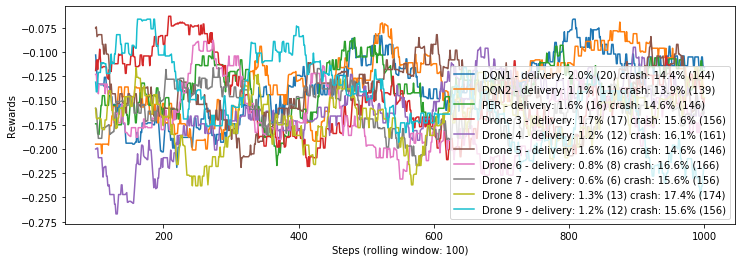

In [6]:
# Setup TensorBoard loggers
tb_logger_1 = TensorBoardLogger(os.path.join('logs', 'dqn1'), datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
tb_logger_2 = TensorBoardLogger(os.path.join('logs', 'dqn2'), datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
tb_logger_3 = TensorBoardLogger(os.path.join('logs', 'dqn3'), datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))

# Create 3 DQN agents with different hyper-parameters and TensorBoard logging
dqn_agent_1 = DQNAgent(
    env, ConvQNetworkFactory(env, conv_layers=[
        {'out_channels': 32, 'kernel_size': 3, 'stride': 2, 'padding': 1},
        {'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1},
        {'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1},
        {'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1},
    ], dense_layers=[256]),
    gamma=0.95, epsilon_start=1, epsilon_decay=0.99, epsilon_end=0.01, memory_size=10000, batch_size=64, 
    target_update_interval=500, logger=tb_logger_1)

dqn_agent_2 = DQNAgent(
    env, ConvQNetworkFactory(env, conv_layers=[
        {'out_channels': 32, 'kernel_size': 3, 'stride': 2, 'padding': 1},
        {'out_channels': 64, 'kernel_size': 3, 'stride': 1, 'padding': 1}
    ], dense_layers=[64, 64]),
    gamma=0.99, epsilon_start=1, epsilon_decay=0.99, epsilon_end=0.01, memory_size=10000, batch_size=64, 
    target_update_interval=500, logger=tb_logger_2)

dqn_agent_3 = DQNAgent(
    env, ConvQNetworkFactory(env, conv_layers=[
        {'out_channels': 64, 'kernel_size': 3, 'stride': 1, 'padding': 1}
    ], dense_layers=[16, 16]),
    gamma=0.99, epsilon_start=1, epsilon_decay=0.99, epsilon_end=0.01, memory_size=10000, batch_size=64, 
    target_update_interval=500, logger=tb_logger_3)

# Reset environment with those parameters
env.reset()

# Setup random opponents
agents = {drone.index: RandomAgent(env) for drone in env.drones}

# Add the RL drones
agents[0] = dqn_agent_1
agents[1] = dqn_agent_2
agents[2] = dqn_agent_3

# Create trainer
trainer = MultiAgentTrainer(env, agents, reset_agents=True, seed=0)

# Let's train!
trainer.train(1000)
rewards = plot_rolling_rewards(trainer.rewards_log, drones_labels={0: 'DQN1', 1: 'DQN2', 2: 'PER'})

In [7]:
trainer.train(5000)

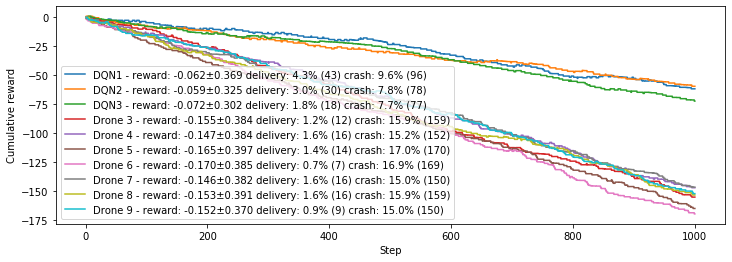

Final scores:
Agent 0: -61.60000000000001
Agent 1: -59.400000000000006
Agent 2: -72.2
Agent 3: -155.0
Agent 4: -146.9
Agent 5: -164.79999999999998
Agent 6: -169.5
Agent 7: -146.4
Agent 8: -153.2
Agent 9: -152.0


In [8]:
# Evaluation
rewards_log = test_agents(env, agents, n_steps=1000)
plot_cumulative_rewards(rewards_log, drones_labels={0: 'DQN1', 1: 'DQN2', 2: 'DQN3'})

# Print final evaluation scores
print('Final scores:')
for idx, score in enumerate(np.sum(list(rewards_log.values()), axis=1)):
    print("Agent {}: {}".format(idx, score))